C:\Users\aryan\AppData\Local\Temp\ipykernel_26484\1848210706.py:7: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('glacier.csv')
C:\Users\aryan\AppData\Local\Temp\ipykernel_26484\1848210706.py:20: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box1 = ax1.boxplot(
C:\Users\aryan\AppData\Local\Temp\ipykernel_26484\1848210706.py:42: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box2 = ax2.boxplot(


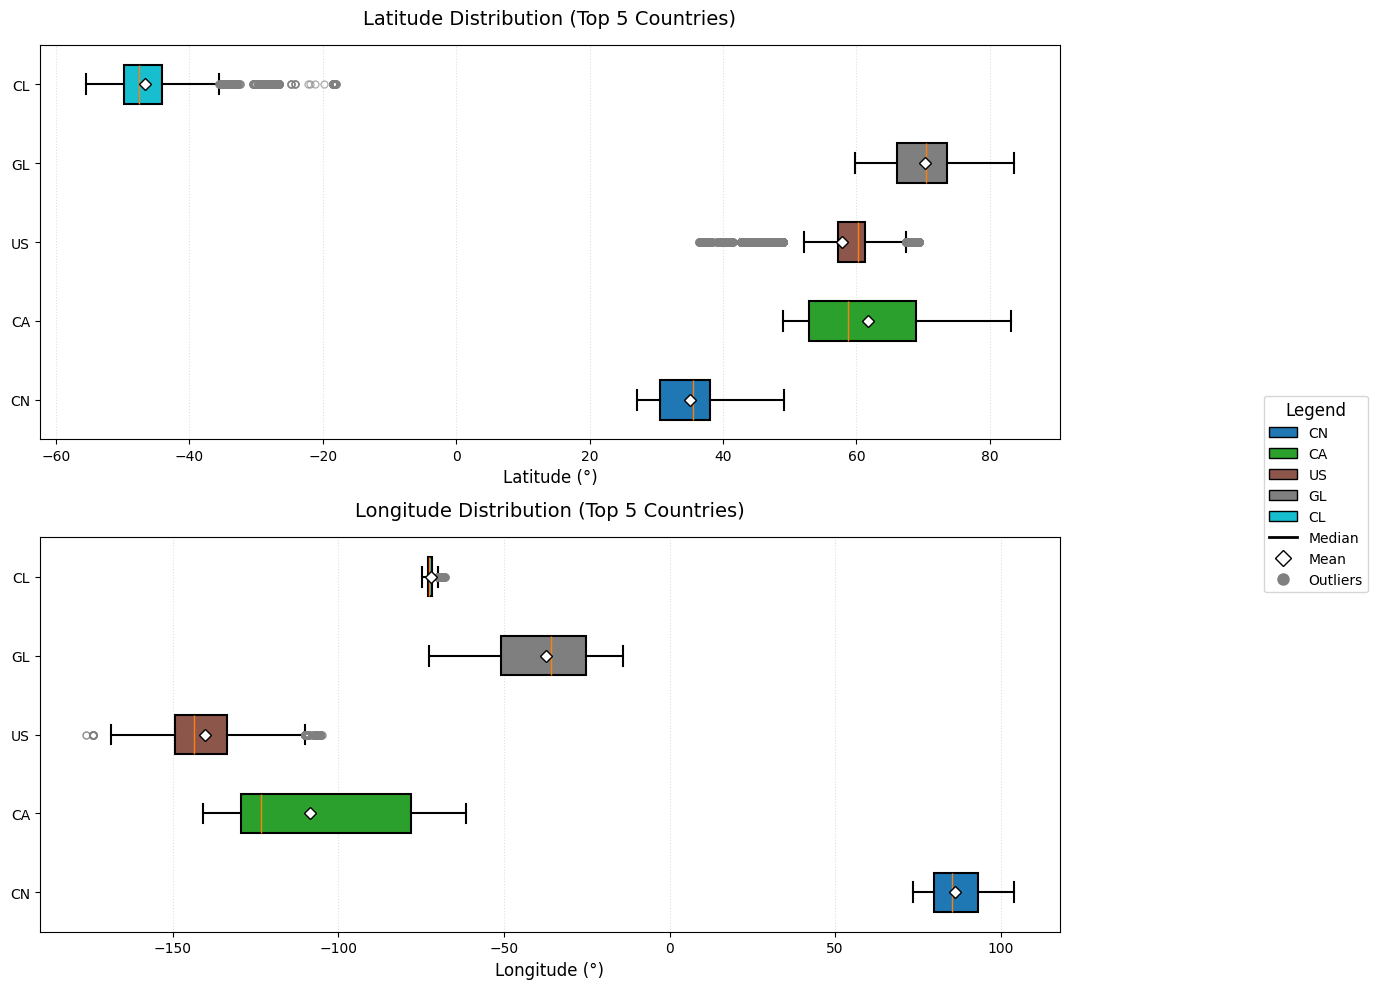

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch

# Load and prepare data
df = pd.read_csv('glacier.csv')

# Get top 5 countries by glacier count
top_5_countries = df['country'].value_counts().head(5).index
df_top5 = df[df['country'].isin(top_5_countries)]

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))

# Custom color palette
colors = plt.cm.tab10(np.linspace(0, 1, 5))

# Latitude Distribution Boxplot
box1 = ax1.boxplot(
    [df_top5[df_top5['country'] == c]['latitude'] for c in top_5_countries],
    patch_artist=True,
    labels=top_5_countries,
    vert=False,
    showmeans=True,
    meanprops={'marker':'D', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':6},
    flierprops={'marker':'o', 'markersize':5, 'alpha':0.6, 'markeredgecolor':'gray'},
    boxprops={'linewidth':1.5},
    whiskerprops={'linewidth':1.5},
    capprops={'linewidth':1.5}
)

# Color the boxes
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_title('Latitude Distribution (Top 5 Countries)', fontsize=14, pad=15)
ax1.set_xlabel('Latitude (°)', fontsize=12)
ax1.grid(axis='x', linestyle=':', alpha=0.4)

# Longitude Distribution Boxplot
box2 = ax2.boxplot(
    [df_top5[df_top5['country'] == c]['longitude'] for c in top_5_countries],
    patch_artist=True,
    labels=top_5_countries,
    vert=False,
    showmeans=True,
    meanprops={'marker':'D', 'markerfacecolor':'white', 'markeredgecolor':'black', 'markersize':6},
    flierprops={'marker':'o', 'markersize':5, 'alpha':0.6, 'markeredgecolor':'gray'},
    boxprops={'linewidth':1.5},
    whiskerprops={'linewidth':1.5},
    capprops={'linewidth':1.5}
)

# Color the boxes
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_title('Longitude Distribution (Top 5 Countries)', fontsize=14, pad=15)
ax2.set_xlabel('Longitude (°)', fontsize=12)
ax2.grid(axis='x', linestyle=':', alpha=0.4)

# Create combined legend
legend_elements = [
    *[Patch(facecolor=colors[i], edgecolor='black', label=country) 
      for i, country in enumerate(top_5_countries)],
    plt.Line2D([0], [0], color='black', lw=2, label='Median'),
    plt.Line2D([0], [0], marker='D', color='w', label='Mean',
              markerfacecolor='white', markeredgecolor='black', markersize=8),
    plt.Line2D([0], [0], marker='o', color='w', label='Outliers',
              markerfacecolor='gray', markeredgecolor='gray', markersize=8)
]

# Position legend closer (reduced bbox_to_anchor x-value)
fig.legend(
    handles=legend_elements,
    loc='center right',
    bbox_to_anchor=(1.15, 0.5),
    frameon=True,
    title='Legend',
    title_fontsize='12'
)

# Adjust layout to accommodate closer legend
plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()